In [1]:
from nequix.data import AseDBDataset

In [2]:
dataset = AseDBDataset(file_path="/ceph/hdd/students/kirsc/data/omol25/train", atomic_numbers=list(range(1, 84)))

In [3]:
len(dataset)

101666280

In [4]:
dataset[0].globals["energy"]

array([-145879.56], dtype=float32)

In [5]:
import numpy as np

In [6]:
metadata = np.load("/ceph/hdd/students/kirsc/data/omol25/train/metadata.npz")
len(metadata['data_ids'])

101666280

In [7]:
metadata['natoms'].max()

350

In [8]:
set(metadata['data_ids'])

{'ani2x',
 'biomolecules',
 'elytes',
 'geom_orca6',
 'metal_complexes',
 'orbnet_denali',
 'reactivity',
 'rgd',
 'spice',
 'trans1x'}

In [ ]:
spice_indices = np.argwhere(metadata['data_ids'] == 'spice')
spice_natoms = metadata['natoms'][spice_indices]
spice_max = spice_natoms.max()
spice_hist = np.histogram(spice_natoms, bins=spice_max, range=(0, spice_max))
len(spice_indices)

1976335

In [38]:
biomolecules_indices = np.argwhere(metadata['data_ids'] == 'biomolecules')
biomolecules_natoms = metadata['natoms'][biomolecules_indices]
biomolecules_max = biomolecules_natoms.max()
biomolecules_hist = np.histogram(biomolecules_natoms, bins=biomolecules_max, range=(0, biomolecules_max))
len(biomolecules_indices)

15088966

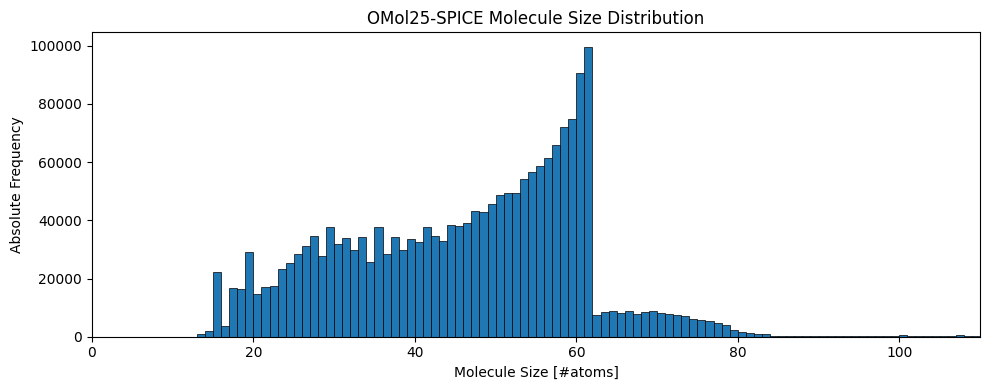

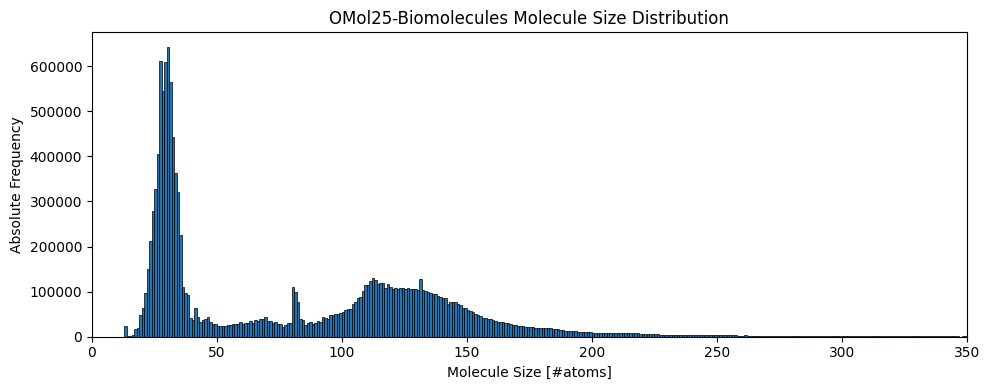

In [43]:
import matplotlib.pyplot as plt
for label, hist in [("OMol25-SPICE", spice_hist), ("OMol25-Biomolecules", biomolecules_hist)]:
    plt.figure(figsize=(10, 4))
    plt.bar(
        hist[1][1:] + 10,
        hist[0],
        width=1,
        align='edge',
        edgecolor='k',
        lw=0.5,
    )
    plt.xlim(0, hist[1][-1])
    plt.xlabel('Molecule Size [#atoms]')
    plt.ylabel('Absolute Frequency')
    plt.title(f'{label} Molecule Size Distribution')
    plt.tight_layout()
    plt.savefig(f'plots/{label}_molsize.pdf', dpi=300)
    plt.savefig(f'plots/{label}_molsize.png', dpi=300)
    plt.show()